In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import datetime as dt

In [235]:
df = pd.read_csv('bike_sharing.csv')

In [236]:
df.head(48)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Dataset is clean, There are no Null Values.

In [238]:
df.shape

(10886, 12)

In [239]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [240]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [241]:
df['day'] = df['datetime'].dt.day

df['month'] = df['datetime'].dt.month

df['hour'] = df['datetime'].dt.hour

df['year'] = df['datetime'].dt.year

In [242]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,2011


In [273]:
day_df = df.groupby([df['day'],df['month'],df['year']])['count'].sum()
day_df = day_df.reset_index()

In [274]:
day_df

,day,month,year,count
0,1,1,2011,985
1,1,1,2012,2294
2,1,2,2011,1360
3,1,2,2012,4579
4,1,3,2011,1851
...,...,...,...,...
451,19,10,2012,5424
452,19,11,2011,3663
453,19,11,2012,5499
454,19,12,2011,3403


In [253]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

we have data for 2 years they are 2011 and 2012
we have data for 12 month and 19 days for each month


In [260]:
column_list=list(df.columns)
col_len=len(column_list)
column_list

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'day',
 'month',
 'hour',
 'year']

In [261]:
uniq = []
for i in range(col_len):
    uniq.append(df[column_list[i]].nunique())
x=zip(column_list,uniq)
for k,v in x:
    print(k +'  :  '+ str(v))

datetime  :  10886
season  :  4
holiday  :  2
workingday  :  2
weather  :  4
temp  :  49
atemp  :  60
humidity  :  89
windspeed  :  28
casual  :  309
registered  :  731
count  :  822
day  :  19
month  :  12
hour  :  24
year  :  2


we can see that season holiday and weather has less unique values, so we can change them into categorical columns

In [262]:
for i in range(len(uniq)):
    if uniq[i]<5:
        df[column_list[i]]=df[column_list[i]].astype('category')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  year        10886 non-null  category      
dtypes: category(5), dateti

In [264]:
df[['temp','atemp']].agg([min,max])

,temp,atemp
min,0.82,0.760
max,41.00,45.455


In [265]:
(df['atemp']-df['temp']).describe()

count    10886.000000
mean         3.424224
std          1.566612
min        -23.140000
25%          2.745000
50%          3.680000
75%          4.055000
max          8.045000
dtype: float64

There is no much difference between temp and atemp around 3.6 degrees.

In [266]:
df[['humidity','windspeed']].agg([min,max])

,humidity,windspeed
min,0,0.0000
max,100,56.9969


In [267]:
df['wind_cat']=pd.cut(df['windspeed'],bins=[-1,0,3,7,12,18,24,31,38,46,54,63],labels=['Calm','Light air','Light breeze','Gentle breeze','Moderate breeze','Fresh breeze','Strong breeze','Moderate gale','Fresh gale','Strong gale','Whole gale'])

Units of the wind speed is not specified so assumed the wind speed in 'mph' and categorized the values.
Above categorized the windspeed according to data present in http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

<AxesSubplot:xlabel='wind_cat', ylabel='count'>

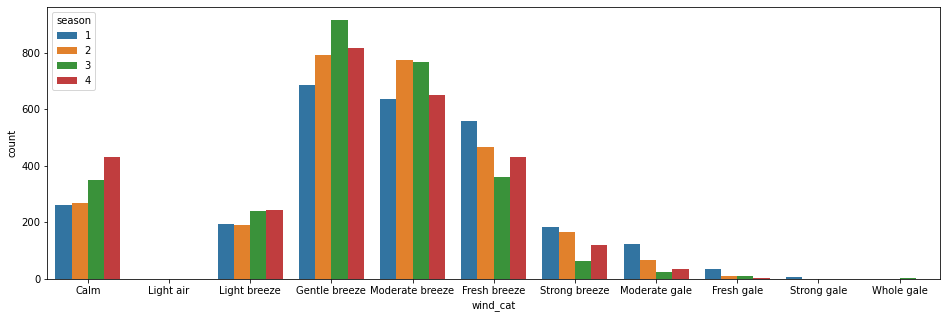

In [268]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['wind_cat'],hue=df['season'])

Wind speed for [0-3] mph is not present, and we can observe that data is right skewed because very few people travel during high wind speeds and most number of people travel during moderate wind speeds. From above plot we can say that-- on days which has wind speed less than 24mph people travels more.

<AxesSubplot:>

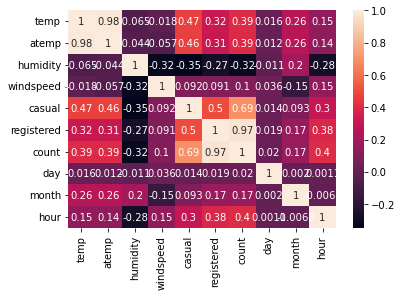

In [269]:
sns.heatmap(data=df.corr(),annot=True)

There is no significant insights from the heatmap

<AxesSubplot:xlabel='holiday', ylabel='count'>

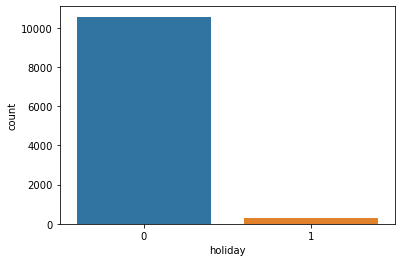

In [17]:
sns.countplot(x=df['holiday'])

In [18]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

from above we can say that most number of the rides were taken place on the non-holiday days considering 0 as not a holiday and 
1 as a holiday

In [275]:
x=df['holiday'].value_counts()
x.index

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')

<AxesSubplot:xlabel='workingday', ylabel='count'>

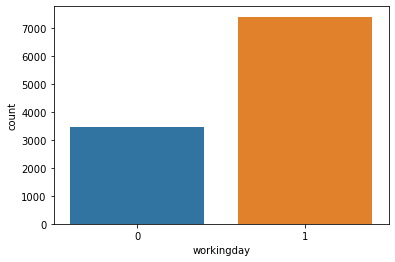

In [276]:
sns.countplot(x=df['workingday'])


from above plots we can see that most of the rides are on working days compared to the holiday

<AxesSubplot:xlabel='count', ylabel='season'>

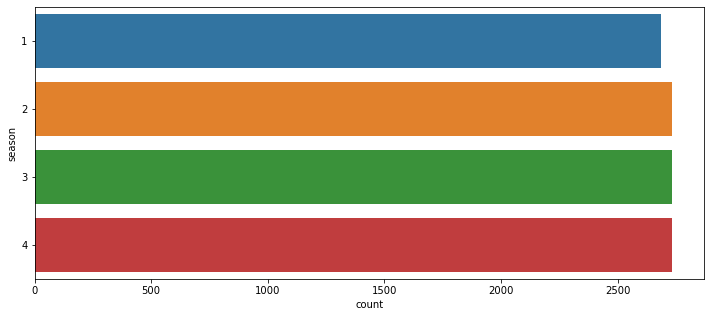

In [278]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['season'])

In [279]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

From above we can say that we have equal amount of data from all sesons

<AxesSubplot:xlabel='weather', ylabel='count'>

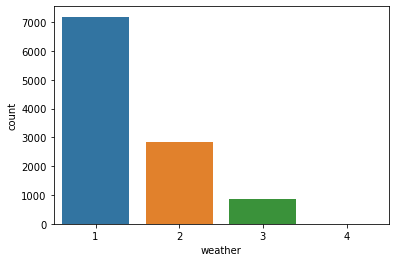

In [280]:
sns.countplot(x=df['weather'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

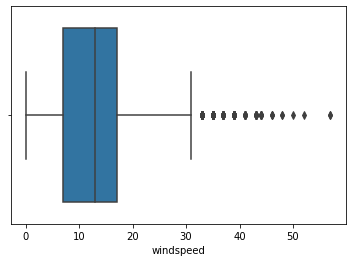

In [281]:
sns.boxplot(df['windspeed'])

There are more outliers in the wind speed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

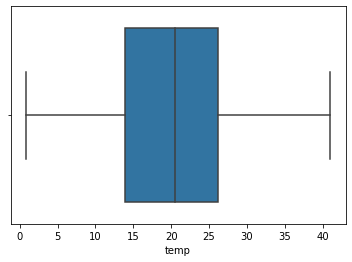

In [282]:
sns.boxplot(df['temp'])

No outliers in Temperature 

In [283]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:>

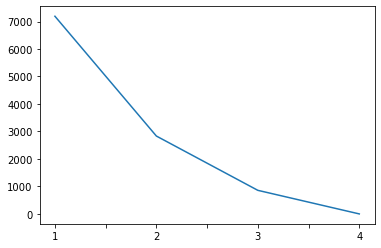

In [284]:
df['weather'].value_counts().plot()

There is only one row data availale for weather type 4 we can consider it as an outlier

In [285]:
x=pd.DataFrame(df.groupby(df['weather'])['count'].sum())
x=x.reset_index()
x

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


There are more number of rides taken place in weather condition 1 compared to other weathers. 

<AxesSubplot:xlabel='weather', ylabel='count'>

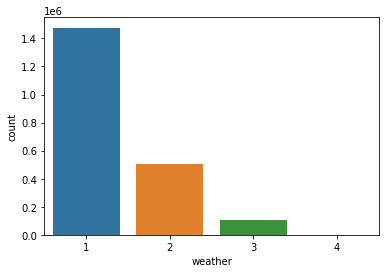

In [287]:
sns.barplot(x=x['weather'],y=x['count'])

<AxesSubplot:xlabel='weather', ylabel='count'>

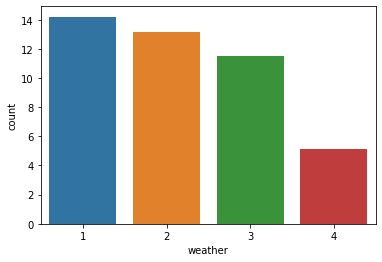

In [288]:
sns.barplot(x=x['weather'],y=np.log(x['count']))

To get more visual understanding converted the data to log

In [289]:
x=pd.DataFrame(df.groupby(df['workingday'])['count'].sum())
x=x.reset_index()
x

,workingday,count
0,0,654872
1,1,1430604


<AxesSubplot:xlabel='workingday', ylabel='count'>

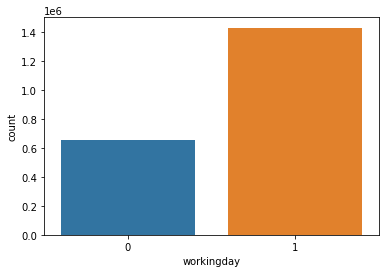

In [290]:
sns.barplot(x=x['workingday'],y=x['count'])

More number of rides were taken place on working days compared to non working days considering 1 as working day and 
0 as non working day

In [292]:
x=pd.DataFrame(df.groupby(df['season'])['count'].sum())
x=x.reset_index()
x

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


<AxesSubplot:xlabel='season', ylabel='count'>

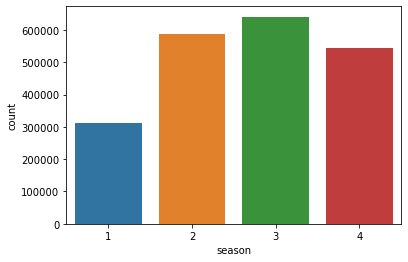

In [35]:
sns.barplot(x=x['season'],y=x['count'])

1: spring, 2: summer, 3: fall, 4: winter
Less number of rides were taken place in spring season compared to other seasons and 
in fall season more number of rides were happened

In [297]:
x=pd.DataFrame(df.groupby(df['holiday'])['count'].sum())
x=x.reset_index()
x

,holiday,count
0,0,2027668
1,1,57808


<AxesSubplot:xlabel='holiday', ylabel='count'>

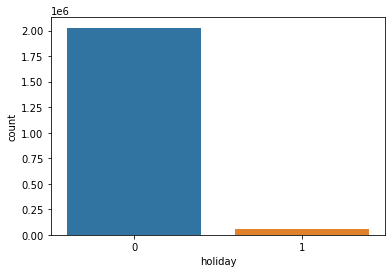

In [298]:
sns.barplot(x=x['holiday'],y=x['count'])

<AxesSubplot:xlabel='holiday', ylabel='count'>

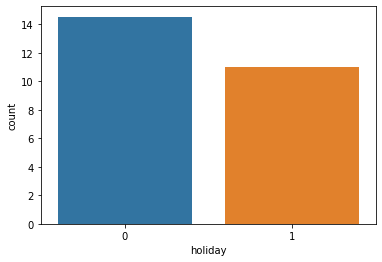

In [38]:
sns.barplot(x=x['holiday'],y=np.log(x['count']))

Less number of rides were happened on holidays, we can infer that most of the people use Yulu to commute to workplaces.

In [301]:
x=pd.DataFrame(df.groupby(df['wind_cat'])['count'].sum())
x=x.reset_index()
x

,wind_cat,count
0,Calm,211526
1,Light air,0
2,Light breeze,128938
3,Gentle breeze,586141
4,Moderate breeze,590389
5,Fresh breeze,387342
6,Strong breeze,118882
7,Moderate gale,51007
8,Fresh gale,10053
9,Strong gale,659


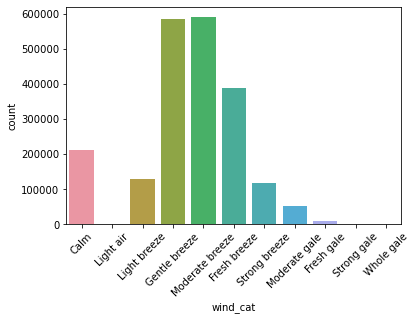

In [302]:
g=sns.barplot(x=x['wind_cat'],y=x['count'])
g.set_xticklabels(labels = x['wind_cat'], rotation = 45)
plt.show()

Most of the rides takes place when there is Gentle,Moderate and fresh breeze.
Users prefer Yulu when the climate is clear

##### Working Day has effect on number of electric cycles rented

In [333]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [334]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [336]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [338]:
df['day'] = df['datetime'].dt.day

df['month'] = df['datetime'].dt.month

df['hour'] = df['datetime'].dt.hour

df['year'] = df['datetime'].dt.year

In [339]:
x=pd.DataFrame(df.groupby([df['month'],df['year']])['count'].sum())
x=x.reset_index()
x

,month,year,count
0,1,2011,23552
1,1,2012,56332
2,2,2011,32844
3,2,2012,66269
4,3,2011,38735
5,3,2012,94766
6,4,2011,50517
7,4,2012,116885
8,5,2011,79713
9,5,2012,120434


<AxesSubplot:xlabel='month', ylabel='count'>

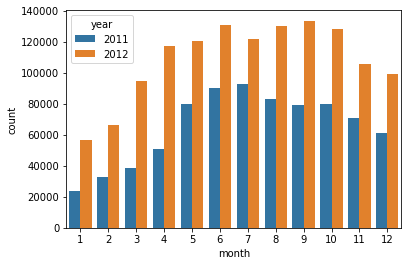

In [340]:
sns.barplot(x=x['month'],y=x['count'],hue=x['year'])

There is a potential increase of rides from 2011 to 2012 in every month.

In [345]:
x=pd.DataFrame(df.groupby(df['year'])['count'].sum())
x=x.reset_index()
x

,year,count
0,2011,781979
1,2012,1303497


<AxesSubplot:xlabel='year', ylabel='count'>

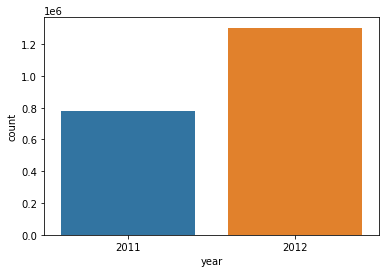

In [346]:
sns.barplot(x=x['year'],y=x['count'])

number of rides in 2012 are increased compared to 2011 

In [347]:
df.loc[df['workingday'] == 0].groupby([df['day'],df['month'],df['year']])['count'].sum()

day  month  year
1    1      2011     985
            2012    2294
     4      2012    6041
     5      2011    3351
     7      2012    5531
                    ... 
19   3      2011    3117
     5      2012    8294
     6      2011    4744
     8      2012    4549
     11     2011    3663
Name: count, Length: 145, dtype: int64

In [348]:
df.loc[df['workingday']==1].groupby([df['day'],df['month'],df['year']])['count'].sum()

day  month  year
1    2      2011    1360
            2012    4579
     3      2011    1851
            2012    4990
     4      2011    2227
                    ... 
19   10     2011    2424
            2012    5424
     11     2012    5499
     12     2011    3403
            2012    5267
Name: count, Length: 311, dtype: int64

### Working Day has effect on number of electric cycles rented -- 2- Sample T-Test

Lets groupby the data by number of rides per each day and split them into working and not working days.

In [349]:
count_not_working= pd.DataFrame(df.loc[df['workingday']==0].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [350]:
count_not_working.shape

(145, 1)

In [351]:
count_not_working=count_not_working.reset_index()
count_not_working=count_not_working.sort_values(by='count')

In [352]:
count_not_working

,day,month,year,count
42,6,3,2011,605
116,16,4,2011,795
8,2,1,2011,801
62,9,1,2011,822
53,8,1,2011,959
...,...,...,...,...
45,6,10,2012,7965
11,2,6,2012,8120
66,9,9,2012,8227
141,19,5,2012,8294


<AxesSubplot:xlabel='count', ylabel='Count'>

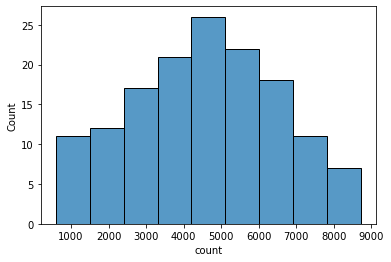

In [353]:
sns.histplot(count_not_working['count'])

Above we can see that data is normal and we are good to perform ttest on the data

In [320]:
count_working = pd.DataFrame(df.loc[df['workingday']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [98]:
count_working.head()

count
day month year       
1   2     2011   1360
          2012   4579
    3     2011   1851
          2012   4990
    4     2011   2227

In [100]:
count_working.shape

(311, 1)

In [101]:
count_working=count_working.reset_index()

In [103]:
count_working.sort_values(by ='count')

,day,month,year,count
151,10,3,2011,623
277,18,1,2011,683
113,7,12,2011,705
179,12,1,2011,1162
163,11,1,2011,1263
...,...,...,...,...
175,11,9,2012,7767
208,13,9,2012,7804
190,12,9,2012,7870
225,14,9,2012,8009


<AxesSubplot:xlabel='count', ylabel='Count'>

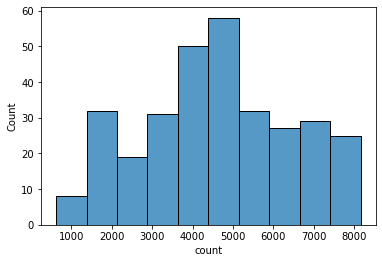

In [173]:
sns.histplot(count_working['count'])

This is almost similar to the normal distribution, lets make kstest to get clear idea about the means.

In [134]:
stat.kstest(count_not_working['count'],count_working['count'],'norm')

KstestResult(statistic=0.06466348819159552, pvalue=0.7710689796479644)

we assume here the alpha as 0.05 and the pvalue > alpha , we can consider these two samples to perform ttest

In [177]:
stat.ttest_ind(count_working['count'].sample(80),count_not_working['count'].sample(80))

Ttest_indResult(statistic=-1.5429234901059325, pvalue=0.12484983501298942)

#### No. of cycles rented similar or different in different seasons -- ANOVA

In [179]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [191]:
season_1= pd.DataFrame(df.loc[df['season']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [192]:
season_1=season_1.reset_index()
season_1=season_1.sort_values(by='count')

In [193]:
season_1

,day,month,year,count
34,6,3,2011,605
58,10,3,2011,623
102,18,1,2011,683
6,2,1,2011,801
48,9,1,2011,822
...,...,...,...,...
107,18,3,2012,5892
113,19,3,2012,6153
89,15,3,2012,6192
83,14,3,2012,6312


In [194]:
season_2= pd.DataFrame(df.loc[df['season']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_2=season_2.sort_values(by='count')
season_2

,day,month,year,count
90,16,4,2011,795
42,8,4,2011,1471
24,5,4,2011,1795
66,12,4,2011,2034
72,13,4,2011,2162
...,...,...,...,...
89,15,6,2012,7665
95,16,6,2012,7702
47,8,6,2012,7736
11,2,6,2012,8120


In [195]:
season_3= pd.DataFrame(df.loc[df['season']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_3=season_3.sort_values(by='count')
season_3

,day,month,year,count
46,8,9,2011,1842
40,7,9,2011,1996
34,6,9,2011,2710
28,5,9,2011,3351
52,9,9,2011,3544
...,...,...,...,...
105,18,8,2012,7865
71,12,9,2012,7870
83,14,9,2012,8009
53,9,9,2012,8227


In [196]:
season_4= pd.DataFrame(df.loc[df['season']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_4=season_4.sort_values(by='count')
season_4

,day,month,year,count
40,7,12,2011,705
92,16,11,2011,1817
66,12,10,2011,2416
108,19,10,2011,2424
0,1,10,2011,2429
...,...,...,...,...
61,11,10,2012,7570
13,3,10,2012,7572
55,10,10,2012,7691
31,6,10,2012,7965


In [197]:
np.var(season_1['count'])

2107165.9556786707

In [198]:
np.var(season_2['count'])

2811640.8291782085

In [199]:
np.var(season_3['count'])

2036263.220683286

In [200]:
np.var(season_4['count'])

2147031.649738381

(array([14., 32., 20., 17., 14.,  8.,  3.,  5.,  0.,  1.]),
 array([ 605. , 1328.1, 2051.2, 2774.3, 3497.4, 4220.5, 4943.6, 5666.7,
        6389.8, 7112.9, 7836. ]),
 <BarContainer object of 10 artists>)

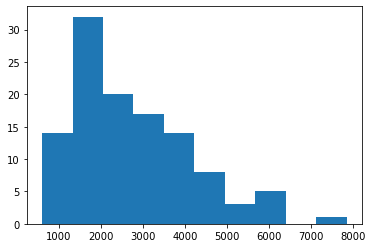

In [202]:
plt.hist(season_1['count'])

(array([ 1.,  1., 10., 18., 18., 20., 25.,  8.,  5.,  8.]),
 array([ 705. , 1450.1, 2195.2, 2940.3, 3685.4, 4430.5, 5175.6, 5920.7,
        6665.8, 7410.9, 8156. ]),
 <BarContainer object of 10 artists>)

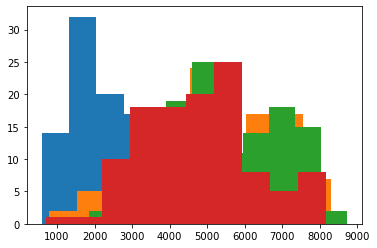

In [205]:
plt.hist(season_1['count'])
plt.hist(season_2['count'])
plt.hist(season_3['count'])
plt.hist(season_4['count'])

The samples are not normally distributed so we will test with levene's as it is performed for 

In [207]:
stat.levene(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

LeveneResult(statistic=1.5071252673249398, pvalue=0.21194448921499898)

In [208]:
stat.f_oneway(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

#### No. of cycles rented similar or different in different weather -- ANOVA

In [209]:
df['weather'].uniqueue()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [210]:
weather_1= pd.DataFrame(df.loc[df['weather']==1].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_1=weather_1.sort_values(by='count')
weather_1

,day,month,year,count
305,14,5,2012,2
226,11,1,2011,15
281,13,5,2011,20
186,9,3,2011,20
348,16,3,2011,27
...,...,...,...,...
267,12,9,2012,7870
34,2,6,2012,7881
197,9,9,2012,8103
111,5,10,2012,8156


In [211]:
weather_2= pd.DataFrame(df.loc[df['weather']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_2=weather_2.sort_values(by='count')
weather_2

,day,month,year,count
114,7,2,2012,5
65,4,6,2012,5
101,6,7,2012,7
204,12,7,2011,8
278,16,7,2012,11
...,...,...,...,...
116,7,5,2012,5228
221,13,7,2012,5429
139,8,8,2012,5497
162,9,10,2012,6000


In [215]:
weather_3= pd.DataFrame(df.loc[df['weather']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_3=weather_3.sort_values(by='count')
weather_3

,day,month,year,count
74,8,2,2011,1
42,4,8,2011,3
123,13,1,2012,3
63,7,1,2011,5
64,7,3,2011,6
...,...,...,...,...
68,7,9,2011,1591
185,19,10,2011,1803
15,1,10,2012,2043
25,2,9,2012,2139


In [214]:
weather_4= pd.DataFrame(df.loc[df['weather']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_4=weather_4.sort_values(by='count')
weather_4

,day,month,year,count
0,9,1,2012,164


Removing the weather 4 as there is no much data in the weather 4 condition

(array([25., 31., 35., 32., 32., 23.,  6.,  2.,  0.,  1.]),
 array([ 1.        ,  7.17773845, 13.35547689, 19.53321534, 25.71095379,
        31.88869223, 38.06643068, 44.24416912, 50.42190757, 56.59964602,
        62.77738446]),
 <BarContainer object of 10 artists>)

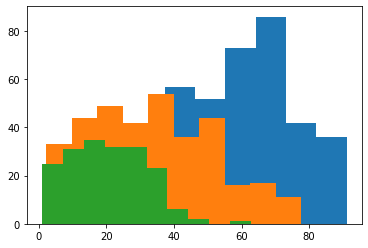

In [293]:
plt.hist(np.sqrt(weather_1['count']))
plt.hist(np.sqrt(weather_2['count']))
plt.hist(np.sqrt(weather_3['count']))
# plt.hist(weather_4['count'])

The data is not normally distributed so we need to perform levene's test.

In [294]:
stat.levene(np.sqrt(weather_1['count']),np.sqrt(weather_2['count']),np.sqrt(weather_3['count']))

LeveneResult(statistic=33.64696582500653, pvalue=7.495205135432121e-15)

In [295]:
stat.f_oneway(weather_1['count'],weather_2['count'],weather_3['count'])

F_onewayResult(statistic=244.75558358157312, pvalue=1.0951526874746051e-86)

#### Weather is dependent on season -- Chi-sq

In [220]:
#Contingency Table
contingency_table=pd.crosstab(df['weather'],df['season'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


In [221]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[1759 1801 1930 1702]
 [ 715  708  604  807]
 [ 211  224  199  225]
 [   1    0    0    0]]


In [222]:
b=stat.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [223]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:4,0])
no_of_columns=len(contingency_table.iloc[0,0:4])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",df)


Degree of Freedom: 9


In [224]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:   ",chi_square_statistic)

chi-square statistic:    3.3970813914527893


In [226]:
#critical_value
critical_value=chi2.ppf(q=1-0.05,df=df)
print('critical_value:',critical_value)

critical_value: 16.918977604620448


In [228]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 0.9464543759349711


In [229]:
print('Significance level: 0.05')
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level: 0.05
Degree of Freedom:  9
chi-square statistic: 3.3970813914527893
critical_value: 16.918977604620448
p-value: 0.9464543759349711


In [354]:
if p_value<=0.05:
    print("Reject H0,There is dependency on weather and season")
else:
    print("Retain H0,There is no dependency on weather and season")

Retain H0,There is no dependency on weather and season
